In [0]:
cd /content/drive/'My Drive'/AIclothes/

/content/drive/My Drive/AIclothes


In [0]:
!git clone https://github.com/NVlabs/stylegan

Cloning into 'stylegan'...
remote: Enumerating objects: 83, done.
remote: Total 83 (delta 0), reused 0 (delta 0), pack-reused 83
Unpacking objects: 100% (83/83), done.


In [0]:
# MAKE TF FROM IMAGES
!python stylegan/dataset_tool.py create_from_images stylegan/datasets/abstract/ 'Image ART 256px'/




Loading images from "Image ART 256px/"
Creating dataset "stylegan/datasets/abstract/"



Added 530 images.


In [0]:
%tensorflow_version 1.14
%cd stylegan
!python train.py

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.14`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.
/content/drive/My Drive/AIclothes/stylegan



Creating the run dir: results/00012-sgan-abstract-1gpu
Copying files to the run dir
dnnlib: Running training.training_loop.training_loop() on localhost...



Streaming data using training.dataset.TFRecordDataset...


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Use `tf.compat.v1.data.get_output_types(dataset)`.
Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(dataset)`.
Instructions for updating:
Use `tf.compat.v1.data.get_output_types(iterator)`.
Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(iterator)`.
Instructions for updating:
Use `tf.compat.v1.data.get_output_classes(iterator)`.
Dataset 

In [0]:
# Load trained network.
import os
import pickle
import numpy as np
import PIL.Image
import dnnlib
import dnnlib.tflib as tflib
import config

dnnlib.tflib.init_tf()

with open('/content/drive/My Drive/AIclothes/stylegan/results/00012-sgan-abstract-1gpu/network-final.pkl', 'rb') as f:
  _G, _D, Gs = pickle.load(f)
  # _G = Instantaneous snapshot of the generator. Mainly useful for resuming a previous training run.
  # _D = Instantaneous snapshot of the discriminator. Mainly useful for resuming a previous training run.
  # Gs = Long-term average of the generator. Yields higher-quality results than the instantaneous snapshot.














Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


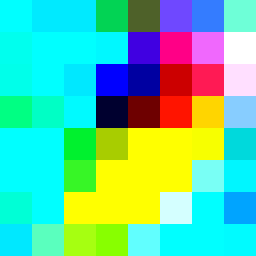

In [0]:
# Pick latent vector.
rnd = np.random.RandomState(5)
latents = rnd.randn(1, Gs.input_shape[1])

# Generate image.
fmt = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
images = Gs.run(latents, None, truncation_psi=0.7, randomize_noise=True, output_transform=fmt)

PIL.Image.fromarray(images[0])